# Understanding Descriptive Statistics

Import the necessary libraries here:

In [12]:
# Libraries
import pandas as pd
import numpy as np
import random
import seaborn as sns
import math
import statistics

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [13]:
# your code here

def roll_dice(x):
    data = []
    for i in range(x):
            result = random.randint(1,6)
            data.append(result)
    df = pd.DataFrame({'number_rolled' : data})
    return df

data = roll_dice(10)
data


,number_rolled
0,3
1,1
2,2
3,5
4,6
5,6
6,3
7,2
8,4
9,5


#### 2.- Plot the results sorted by value.

<AxesSubplot:>

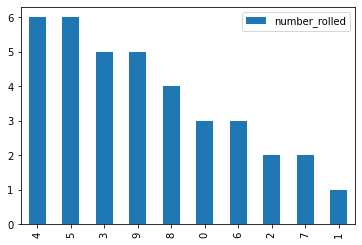

In [14]:
# your code here

data.sort_values(by = 'number_rolled', ascending = False).plot.bar()
#Not sure if I've understood the question - this doesn't seem like a useful plot. 

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

<AxesSubplot:>

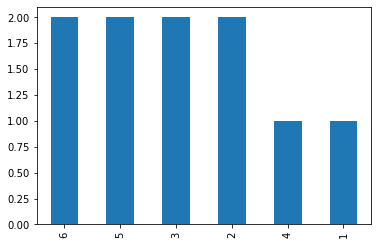

In [25]:
# your code here
df1 = data['number_rolled'].value_counts().sort_values(ascending = False)
df1.plot.bar()
#paolo: this is a way of plotting the frequency but frequency distr is usually a slighly different plo

<AxesSubplot:>

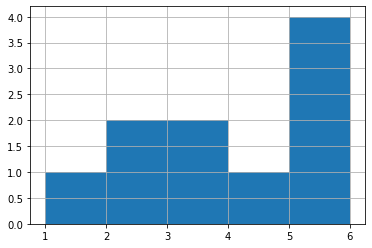

In [24]:
#paolo: frequency distributioin using histogramme- check difference with your plot
data['number_rolled'].hist(bins=5)

In [5]:
"""
your comments here
"""
#Uneven frequency distribution 

'\nyour comments here\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [27]:
# your code here
def compute_mean(df):
    mean = df.sum() / len(df)
    return mean

compute_mean(data)

number_rolled    3.7
dtype: float64

In [26]:
#paolo: yes-you could checck your functions using the
# builtin functions also for next questions
data.mean()

number_rolled    3.7
dtype: float64

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [16]:
# your code here
df1
#Already calculated in previous question

1    3
4    2
5    2
2    1
3    1
6    1
Name: number_rolled, dtype: int64

In [17]:
compute_mean(df1)
#Each number has been rolled on average this many times

1.6666666666666667

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [28]:
# your code here
def compute_median(df):
    list1 = sorted(list(df))
    i = len(list1) / 2
    if len(list1) % 2 != 0:
        return list1[int(i)]
    else:
        a = list1[int(i)]
        b = list1[int(i-1)]
        return (a + b) / 2

compute_median(df1)


2.0

In [29]:
#paolo: check with builtin function
df1.median()

2.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [32]:
# your code here
def compute_quartile(df):
    q2 = compute_median(df)
    sorted_list = sorted(list(df))
    q1 = compute_median(sorted_list[:len(sorted_list)//2])
    q3 = compute_median(sorted_list[len(sorted_list)//2:])
    return {'Q1' : q1, 'Q2' : q2, 'Q3' : q3}

compute_quartile(df1)
#paolo: good approach and what about q4?

{'Q1': 1, 'Q2': 2.0, 'Q3': 2}

In [38]:
#paolo: check with builin function
# There is not a single way to calculate quartiles ,pandas can use different
# interpolation methods (interpolation='midpoint' gives a different result)
df1.quantile([0.25, 0.5, 0.75, 1], interpolation='nearest')

0.25    1
0.50    2
0.75    2
1.00    2
Name: number_rolled, dtype: int64

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from [here](https://drive.google.com/file/d/1mDz-pl6Dpp0fvrXqkFTosuaW3mw6tfWP/view?usp=sharing), place it in the `data` folder and load it
#### 1.- Sort the values and plot them. What do you see?

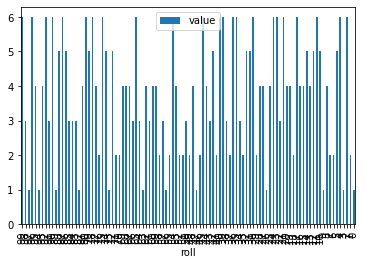

In [45]:
# your code here
dice_data = pd.read_csv('../data/roll_the_dice_hundred.csv')
dice_data[['roll', 'value']].sort_values(by = 'roll', ascending = False).plot.bar(x='roll', y='value'); 
#paolo: good start!  idea is to sort by value-check below

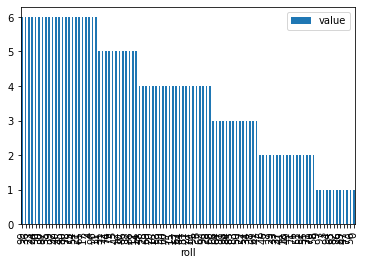

In [46]:
dice_data[['roll', 'value']].sort_values(by = 'value', ascending = False).plot.bar(x='roll', y='value'); 
#paolo: this way you can have an idea of how often each number came up

In [27]:
"""
your comments here
"""
#This seems like a strange way to plot this - not sure if I understood correctly

'\nyour comments here\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [47]:
# your code here
compute_mean(dice_data['value'])
#paolo:yes!

3.74

#### 3.- Now, calculate the frequency distribution.


In [48]:
# your code here
dice_data_clean = dice_data[['roll', 'value']]
df2 = dice_data_clean['value'].value_counts().sort_values(ascending = False)
df2


6    23
4    22
2    17
3    14
1    12
5    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<AxesSubplot:>

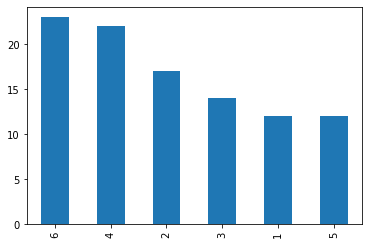

In [49]:
# your code here
df2.plot.bar()
#paolo: ok frequency distribution is usually a slighly different plot, same as above
# the possible outcomes (1-6) are on the x axis ordered, and the frequency on
# y axis- check below


<AxesSubplot:>

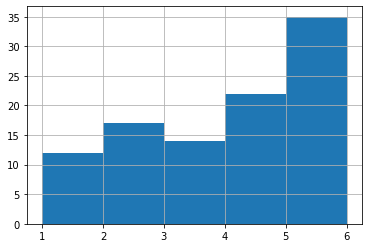

In [51]:
#paolo: frequecny distribution
dice_data_clean.value.hist(bins=5)

In [ ]:
"""
your comments here
"""
#Seems like a biased dice (would expect all columns to be the same height)
#paolo:yes- or maybe sample is not big enough

#### 5 Read the `roll_the_dice_thousand.csv` from <br> 
[here](https://drive.google.com/file/d/1zYzEcKL1tA69WCACG8WhTEr7m9fojClZ/view?usp=sharing), place it in the `data` folder and load it. 
Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

<AxesSubplot:>

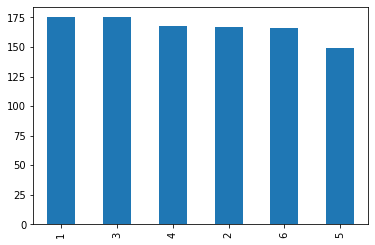

In [52]:
# your code here
dice_data1000 = pd.read_csv('../data/roll_the_dice_thousand.csv')
dice_data1000_clean = dice_data1000[['roll', 'value']]
df3 = dice_data1000_clean['value'].value_counts().sort_values(ascending = False)
df3.plot.bar()
#paolo: same comment as above for distribution


In [40]:
"""
your comments here
"""
#The more times you roll the dice, the closer you get to all numbers being rolled equally
#paolo:yes

'\nyour comments here\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`

from [here](https://drive.google.com/file/d/1sHr5-fnvn9oBvxu3tlR4ANCnQHDV-bUc/view?usp=sharing), place it in the data folder and load it. <br>
Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

<AxesSubplot:>

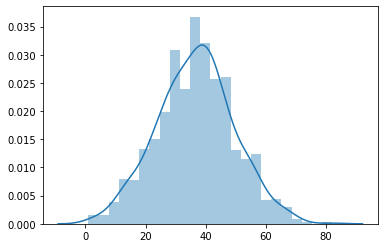

In [53]:
# your code here
age_data = pd.read_csv('../data/ages_population.csv')
sns.distplot(age_data)
#paolo: nice plot!

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [53]:
# your code here
compute_mean(age_data)


observation    36.56
dtype: float64

In [52]:
np.std(age_data)

observation    12.81009
dtype: float64

In [ ]:
"""
your comments here
"""
#Estimated mean to be around 40, and std dev around 20, was a bit far off on the std dev. 


#### 3.- Now read the file `ages_population2.csv` 
from [here](https://drive.google.com/file/d/1RWGflLnwLOgZICUnrc9COzj3qcUeJP0X/view?usp=sharing) place it in the data folder and load it.  Calculate the frequency distribution and plot it.

<AxesSubplot:>

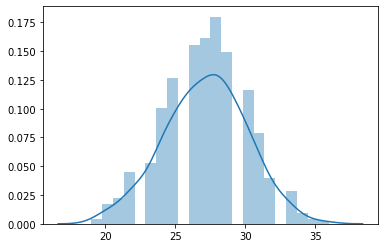

In [54]:
# your code here
age_data2 = pd.read_csv('../data/ages_population2.csv')
sns.distplot(age_data2)

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [45]:
"""
your comments here
"""
#Ages are less widely distributed

'\nyour comments here\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [55]:
# your code here
compute_mean(age_data2)

observation    27.155
dtype: float64

In [56]:
np.std(age_data2)

observation    2.968329
dtype: float64

In [57]:
"""
your comments here
"""
#range is much smaller so std dev is also much smaller. 

'\nyour comments here\n'

In [64]:
#paolo: for quick checks you could also use describe to have all descriptives with one line of code
age_data2.describe()

,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv` 
from [here](https://drive.google.com/file/d/1knUGLeVUADYUXYqq_Ap48oTtLKkjHCNv/view?usp=sharing) and place it in the data folder. Calculate the frequency distribution and plot it.

<AxesSubplot:>

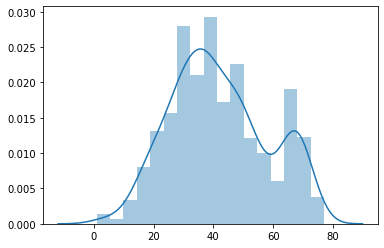

In [58]:
# your code here
age_data3 = pd.read_csv('../data/ages_population3.csv')
sns.distplot(age_data3)

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [60]:
# your code here
compute_mean(age_data3)

observation    41.989
dtype: float64

In [62]:
np.std(age_data3)

observation    16.136632
dtype: float64

In [ ]:
"""
your comments here
"""
#The mean age is higher than expected because the distribution is bi-modal

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [59]:
# your code here
age_data4 = age_data3['observation']
compute_quartile(age_data4)

{'Q1': 30.0, 'Q2': 40.0, 'Q3': 53.0}

In [ ]:
"""
your comments here
"""
#quartiles are much higher because the data is weighted toward the right side

In [60]:
#paolo: you could also compare mean and median, what does the difference tell you?

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [60]:
# your code here
np.percentile(age_data4, range(10, 100, 10))

array([22., 28., 32., 36., 40., 45., 50., 57., 67.])

In [61]:
"""
your comments here
"""
#more of these values are above the mean showing its weighting toward the right

'\nyour comments here\n'

In [63]:
#paolo check:  good work!

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""